In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [270]:
path = "/Users/somduttasinha/Google Drive/Personal Projects/AFL-Stats/team_stats/match_stats_2022.csv"
path_2021 = "/Users/somduttasinha/Google Drive/Personal Projects/AFL-Stats/team_stats/match_stats_2021.csv"
path_2020 = "/Users/somduttasinha/Google Drive/Personal Projects/AFL-Stats/team_stats/match_stats_2020.csv"
path_2012 = "/Users/somduttasinha/Google Drive/Personal Projects/AFL-Stats/team_stats/match_stats_2012.csv"
def construct_path_for_year(year):
    base = "/Users/somduttasinha/Google Drive/Personal Projects/AFL-Stats/team_stats/match_stats_"
    return base + str(year) + ".csv"

In [271]:
game = pd.read_csv(construct_path_for_year(2022))
#games_2022 = pd.read_csv(path)
game

,away.stats.totals.behinds,away.stats.totals.bounces,away.stats.totals.clangers,away.stats.totals.clearances.centreClearances,away.stats.totals.clearances.stoppageClearances,away.stats.totals.clearances.totalClearances,away.stats.totals.contestedMarks,away.stats.totals.contestedPossessions,away.stats.totals.disposalEfficiency,away.stats.totals.disposals,...,home.stats.totals.superGoals,home.stats.totals.tackles,home.stats.totals.tacklesInside50,home.stats.totals.totalPossessions,home.stats.totals.turnovers,home.stats.totals.uncontestedPossessions,home.team.teamAbbr,home.team.teamId,home.team.teamName,home.team.teamNickname
0,5,4,59,18,22,40,6,126,76.9,376,...,NaN,46,7,350,66,204,MELB,CD_T90,Melbourne,Demons
1,10,13,79,12,10,22,8,114,73.9,307,...,NaN,42,14,360,60,225,CARL,CD_T30,Carlton,Blues
2,12,5,66,18,20,38,9,147,72.7,388,...,NaN,51,10,365,72,221,STK,CD_T130,St Kilda,Saints
3,6,9,48,8,19,27,8,109,81.4,408,...,NaN,37,2,385,55,234,GEEL,CD_T70,Geelong Cats,Cats
4,10,6,50,11,31,42,11,130,73.7,312,...,NaN,62,5,334,56,191,GWS,CD_T1010,GWS Giants,Giants
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,15,13,47,15,11,26,12,129,78.7,367,...,NaN,46,8,319,73,195,ESS,CD_T50,Essendon,Bombers
194,13,0,65,13,27,40,19,146,63.1,287,...,NaN,68,21,382,59,236,PORT,CD_T110,Port Adelaide,Power
195,15,2,50,17,32,49,9,153,73.5,388,...,NaN,57,4,351,65,223,HAW,CD_T80,Hawthorn,Hawks
196,9,4,60,10,23,33,15,123,71.6,328,...,NaN,64,15,356,67,179,CARL,CD_T30,Carlton,Blues


In [272]:
def complexify_simple_metrics(metrics):
    home_metrics = ["home.stats.totals." + i for i in metrics] # come directly from csv
    away_metrics = ["away.stats.totals." + j for j in metrics] # come directly from csv
    return home_metrics, away_metrics

# metrics is an array of categories that we want to display on our table
def create_table(games, metrics):
    all_metrics = complexify_simple_metrics(metrics)
    home_metrics = all_metrics[0]
    away_metrics = all_metrics[1]
    
    df = pd.DataFrame()
    
    df["home_team"] = games["home.team.teamName"]
    df["away_team"] = games["away.team.teamName"]
    
    # go through each metric twice and create tables
    
    for i, metric in enumerate(metrics):
        df[("home_" + metric)] = games[home_metrics[i]]
        
    for i, metric in enumerate(metrics):
        df[("away_" + metric)] = games[away_metrics[i]]
        
    
    return df



metrics = ["inside50s", "goals", "behinds", "shotsAtGoal", "marksInside50"]

table_2021 = create_table(pd.read_csv(construct_path_for_year(2022)), metrics)

table_2021

,home_team,away_team,home_inside50s,home_goals,home_behinds,home_shotsAtGoal,home_marksInside50,away_inside50s,away_goals,away_behinds,away_shotsAtGoal,away_marksInside50
0,Melbourne,Western Bulldogs,57,14,13,34,17,51,11,5,18,6
1,Carlton,Richmond,64,14,17,32,11,40,11,10,23,10
2,St Kilda,Collingwood,47,12,13,25,9,54,15,12,28,12
3,Geelong Cats,Essendon,63,20,18,36,13,48,11,6,20,14
4,GWS Giants,Sydney Swans,48,13,14,28,14,49,17,10,29,9
...,...,...,...,...,...,...,...,...,...,...,...,...
193,Essendon,Richmond,42,11,9,22,11,58,21,15,37,21
194,Port Adelaide,Adelaide Crows,61,16,15,35,18,48,7,13,18,8
195,Hawthorn,Western Bulldogs,39,10,4,16,12,71,12,15,31,15
196,Carlton,Collingwood,65,10,14,26,11,44,11,9,21,9


In [273]:
#### LEGACY ####
def create_raw_score(df, category):
    colname = "raw_"+category+ "_score"
    df[colname] = df[category] / df[category].mean()
    return df
#### LEGACY ####

In [274]:
def fix_NaN_issue(df, column):
    if (column == "home_shotsAtGoal"):
        df[column] = df["home_goals"] + df["home_behinds"]
    elif (column == "away_shotsAtGoal"):
        df[column] = df["away_goals"] + df["away_behinds"]
        
        
def generate_raw_match_scores(df, metrics):
    # relies on the fact that metrics are the same from before.
    # for each metric, generate raw score
    # home
    for metric in metrics:
        if (metric != "goals" and metric != "behinds"):
            colname = "raw_home_"+metric+ "_score"
            category = "home_" + metric
            if (df[category].isnull().values.any()):

                fix_NaN_issue(df, "home_shotsAtGoal")
            df[colname] = df[category] / df[category].mean()
        
    # away
    for metric in metrics:
        if (metric != "goals" and metric != "behinds"):
            colname = "raw_away_"+metric+ "_score"
            category = "away_" + metric
            if (df[category].isnull().values.any()):
            
                fix_NaN_issue(df, "away_shotsAtGoal")
            df[colname] = df[category] / df[category].mean()
    
    return df
table = create_table(pd.read_csv(construct_path_for_year(2013)), metrics)
x = generate_raw_match_scores(table, metrics)
x.iloc[18]       

home_team                       Fremantle
away_team                        Essendon
home_inside50s                         59
home_goals                              9
home_behinds                           14
home_shotsAtGoal                       23
home_marksInside50                     11
away_inside50s                         46
away_goals                             10
away_behinds                           12
away_shotsAtGoal                       22
away_marksInside50                      6
raw_home_inside50s_score          1.13736
raw_home_shotsAtGoal_score       0.886923
raw_home_marksInside50_score     0.887373
raw_away_inside50s_score         0.927889
raw_away_shotsAtGoal_score        0.89681
raw_away_marksInside50_score     0.543307
Name: 18, dtype: object

In [275]:
def attacking_score(df, inside50s_weight = 0.3, shots_weight = 0.6, marksInside50_weight = 0.2):
    df["raw_home_attack_score"] = (inside50s_weight * df["raw_home_inside50s_score"]) + (shots_weight * df["raw_home_shotsAtGoal_score"]) + (marksInside50_weight * df["raw_home_marksInside50_score"])
    df["raw_away_attack_score"] = (inside50s_weight * df["raw_away_inside50s_score"]) + (shots_weight * df["raw_away_shotsAtGoal_score"]) + (marksInside50_weight * df["raw_away_marksInside50_score"])
    return df
y = attacking_score(x)

In [276]:
# everyone starts on 1

In [277]:
class Team:
    def __init__(self, team_name, attack_score, defence_score):
        self.team_name = team_name
        self.attack_score = attack_score
        self.defence_score = defence_score
        self.log = pd.DataFrame(columns=["home_team", "away_team", "scaled_attack_score", "scaled_defence_score", "current_attack_score", "current_defence_score"])
        
    def adjust_attack_score(self, recent_attack_score):
        self.attack_score = (0.95 * self.attack_score) + (0.05 * recent_attack_score)
        
    def adjust_defence_score(self, recent_defence_score):
        self.defence_score = (0.95 * self.defence_score) + (0.05* recent_defence_score)

        
    def add_match_record(self, row):
        self.log = pd.concat([self.log, row], ignore_index=True)
    
        

In [278]:
team_names = ["Adelaide Crows", "Brisbane Lions", "Carlton", "Collingwood", "Essendon", "Fremantle", "Geelong Cats",
        "Gold Coast Suns", "GWS Giants", "Hawthorn", "Melbourne", "North Melbourne", "Port Adelaide",
        "Richmond", "St Kilda", "Sydney Swans", "West Coast Eagles", "Western Bulldogs"]

In [11]:
name_to_object_dict = dict()

In [252]:
teams = []
for name in team_names:
    team = Team(name, 1, 1)
    teams.append(team)
for team in teams:
    name_to_object_dict[team.team_name] = team
    
def refresh_teams():
    for team in teams:
        team.attack_score = 1
        team.defence_score = 1
        team.log.drop(team.log.index, inplace=True)

In [279]:
# go through each game
# modify the team's scores

def run_model(games, metrics, start_index = 0, end_index=207, refresh=True):
    if refresh:
        refresh_teams()
    team.log = pd.DataFrame()
    dataframe = create_table(games, metrics)
    generate_raw_match_scores(dataframe, metrics)
    attacking_score(dataframe)
    raw_table = attacking_score(dataframe)[["home_team", "away_team", "raw_home_attack_score", "raw_away_attack_score"]]#[start_index:end_index]
    #display(raw_table)
    scaled_home_attack_scores = []
    scaled_home_defence_scores = []
    
    scaled_away_attack_scores = []
    scaled_away_defence_scores = []
    for match in raw_table.iterrows():
        home_team_name = match[1][0]
        away_team_name = match[1][1]
        home_team = name_to_object_dict[home_team_name]
        away_team = name_to_object_dict[away_team_name]
        
        home_raw_attack_score = match[1][2]
        away_raw_attack_score = match[1][3]
                
        
        home_raw_defence_score = away_raw_attack_score
        away_raw_defence_score = home_raw_attack_score

        opponent_scaled_home_attack_score = scale_attack_score(home_raw_attack_score, away_team.defence_score)
        home_team.adjust_attack_score(opponent_scaled_home_attack_score)

        opponent_scaled_home_defence_score = scale_defence_score(home_raw_defence_score, away_team.attack_score)
        home_team.adjust_defence_score(opponent_scaled_home_defence_score)

        opponent_scaled_away_attack_score = scale_attack_score(away_raw_attack_score, home_team.defence_score)
        away_team.adjust_attack_score(opponent_scaled_away_attack_score)

        opponent_scaled_away_defence_score = scale_defence_score(away_raw_defence_score, home_team.attack_score)
        away_team.adjust_defence_score(opponent_scaled_away_defence_score)

        scaled_home_attack_scores.append(opponent_scaled_home_attack_score)
        scaled_home_defence_scores.append(opponent_scaled_home_defence_score) 

        scaled_away_attack_scores.append(opponent_scaled_away_attack_score)
        scaled_away_defence_scores.append(opponent_scaled_away_defence_score)
        
        home_record = pd.DataFrame(data={"home_team": home_team_name, 
                       "away_team": away_team_name, 
                       "scaled_attack_score": opponent_scaled_home_attack_score, 
                       "scaled_defence_score": opponent_scaled_home_defence_score,
                      "current_attack_score": home_team.attack_score,
                      "current_defence_score": home_team.defence_score}, index=[0])
        
        away_record = pd.DataFrame(data={"home_team": home_team_name, 
                       "away_team": away_team_name, 
                       "scaled_attack_score": opponent_scaled_away_attack_score, 
                       "scaled_defence_score": opponent_scaled_away_defence_score,
                      "current_attack_score": away_team.attack_score,
                      "current_defence_score": away_team.defence_score}, index=[0])

        home_team.add_match_record(home_record)
        away_team.add_match_record(away_record)
    
        
        
    dataframe["scaled_home_attack_score"] = pd.Series(scaled_home_attack_scores)
    dataframe["scaled_home_defence_score"] = pd.Series(scaled_home_defence_scores)
    
    dataframe["scaled_away_attack_score"] = pd.Series(scaled_away_attack_scores)
    dataframe["scaled_away_defence_score"] = pd.Series(scaled_away_defence_scores)
    
    
    return dataframe

run_model(pd.read_csv(construct_path_for_year(2022)), metrics)

,home_team,away_team,home_inside50s,home_goals,home_behinds,home_shotsAtGoal,home_marksInside50,away_inside50s,away_goals,away_behinds,...,raw_home_marksInside50_score,raw_away_inside50s_score,raw_away_shotsAtGoal_score,raw_away_marksInside50_score,raw_home_attack_score,raw_away_attack_score,scaled_home_attack_score,scaled_home_defence_score,scaled_away_attack_score,scaled_away_defence_score
0,Melbourne,Western Bulldogs,57,14,13,34,17,51,11,5,...,1.518268,0.981246,0.748268,0.545956,1.428060,0.852526,1.428060,0.852526,0.858859,1.398136
1,Carlton,Richmond,64,14,17,32,11,40,11,10,...,0.982409,0.769605,0.956120,0.909926,1.313640,0.986539,1.313640,0.986539,0.987203,1.293358
2,St Kilda,Collingwood,47,12,13,25,9,54,15,12,...,0.803789,1.038966,1.163972,1.091912,1.016472,1.228456,1.016472,1.228456,1.214582,1.015636
3,Geelong Cats,Essendon,63,20,18,36,13,48,11,6,...,1.161028,0.923525,0.831409,1.273897,1.437812,1.030682,1.437812,1.030682,1.029104,1.407012
4,GWS Giants,Sydney Swans,48,13,14,28,14,49,17,10,...,1.250338,0.942766,1.205543,0.818934,1.182073,1.169942,1.182073,1.169942,1.160085,1.171409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,Essendon,Richmond,42,11,9,22,11,58,21,15,...,0.982409,1.115927,1.538106,1.910846,0.953151,1.639811,0.914314,1.451597,1.480809,0.918847
194,Port Adelaide,Adelaide Crows,61,16,15,35,18,48,7,13,...,1.607578,0.923525,0.748268,0.727941,1.492211,0.871607,1.407144,0.872731,0.877755,1.368510
195,Hawthorn,Western Bulldogs,39,10,4,16,12,71,12,15,...,1.071719,1.366048,1.288684,1.364890,0.812743,1.456003,0.779267,1.332531,1.311773,0.824708
196,Carlton,Collingwood,65,10,14,26,11,44,11,9,...,0.982409,0.846565,0.872979,0.818934,1.178124,0.941544,1.175516,0.913605,0.935100,1.100855


In [280]:
def end_of_season_table():
    data = {
        "team_name": (i.team_name for i in teams),
        "team_attack_score": (100*j.attack_score for j in teams),
        "team_defence_score": ((100*k.defence_score) for k in teams),
        "shifted_team_defence_score": ((200-(100*k.defence_score)) for k in teams)
    }
    all_teams = pd.DataFrame(data=data)
    all_teams["differential"] = all_teams["team_attack_score"] - all_teams["team_defence_score"]
    all_teams = all_teams.reset_index(drop=True)
    sorted_all_teams = all_teams.sort_values(by=["differential"], ascending=False)
    sorted_all_teams = sorted_all_teams.reset_index(drop=True)
    sorted_all_teams.index = sorted_all_teams.index + 1
    return sorted_all_teams

In [281]:
all_teams = end_of_season_table()

In [282]:
# melbourne 2021: 15.69, port adelaide 2020: 10.46, richmond 2019: 12.71, melbourne 2018: 15, adelaide 2017: 14.69, adelaide 2016: 15.04, west coast eagles 2015: 17.58

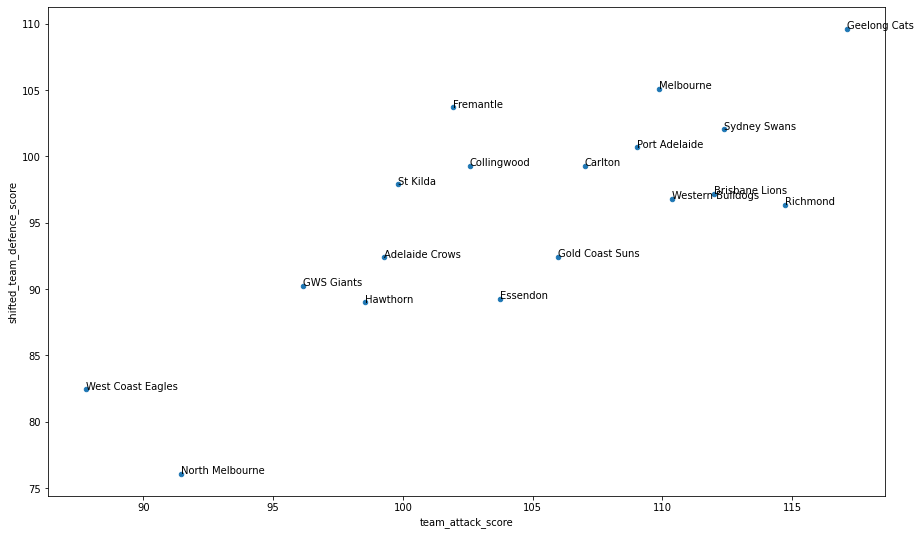

In [283]:
plt.rcParams["figure.figsize"] = (15,9)
ax = all_teams.plot.scatter(x = 'team_attack_score', y = 'shifted_team_defence_score')
for i, txt in enumerate(all_teams["team_name"]):
   ax.annotate(txt, (all_teams.team_attack_score.iat[i]+0.00005, all_teams.shifted_team_defence_score.iat[i]))


In [284]:
def scale_attack_score(raw_attack_score, opposition_defence_score):
    return (raw_attack_score / opposition_defence_score)

In [285]:
# high attack score is good, low defence score is good

In [286]:
def scale_defence_score(raw_defence_score, opposition_attack_score):
    return (raw_defence_score / opposition_attack_score)

In [287]:
def slim_table(df, columns=["home_team", "away_team", "home_raw_attack_score"]):
    return df[columns]

In [288]:
def calculate_new_defence_score(arr):
    if (len(arr) == 0):
        return 1
    return ((0.05 * arr[-1]) + (0.95 * calculate_new_defence_score(arr[:-1])))

In [293]:
x_vals = []
team1_y_vals = []
team2_y_vals = []
refresh_teams()
for year in range(2013, 2023):
    refresh = True
    x = run_model(pd.read_csv(construct_path_for_year(year)), metrics, refresh = refresh)
    print(year)
    display(end_of_season_table()[0:18])
    x_vals.append(year)
    team1 = name_to_object_dict["Port Adelaide"]
    team1_y_vals.append((100*team1.attack_score) - (100*team1.defence_score))
    team2 = name_to_object_dict["GWS Giants"]
    team2_y_vals.append((100*team2.attack_score) - (100*team2.defence_score))
    #print(year)
    #display(end_of_season_table().head(1))
    #        "team_attack_score": (100*j.attack_score for j in teams),
    #"team_defence_score": ((100*k.defence_score) for k in teams),

    

2013


,team_name,team_attack_score,team_defence_score,shifted_team_defence_score,differential
1,Hawthorn,119.231327,97.039086,102.960914,22.192240
2,Geelong Cats,113.673949,93.987781,106.012219,19.686168
3,Collingwood,111.187219,97.022663,102.977337,14.164556
4,Richmond,109.687674,97.686533,102.313467,12.001141
5,Fremantle,101.341139,90.122009,109.877991,11.219130
6,North Melbourne,109.077428,99.263189,100.736811,9.814240
7,Adelaide Crows,106.836585,98.785943,101.214057,8.050642
8,Sydney Swans,105.160183,98.487583,101.512417,6.672600
9,Carlton,110.325665,106.226701,93.773299,4.098963
10,Port Adelaide,106.477515,102.432230,97.567770,4.045284


2014


,team_name,team_attack_score,team_defence_score,shifted_team_defence_score,differential
1,Port Adelaide,118.912875,94.581487,105.418513,24.331388
2,Hawthorn,117.676366,97.083148,102.916852,20.593218
3,Sydney Swans,114.939505,94.752920,105.247080,20.186585
4,West Coast Eagles,106.346594,95.770552,104.229448,10.576042
5,Fremantle,106.272650,97.133652,102.866348,9.138998
6,Essendon,106.923371,98.070280,101.929720,8.853091
7,Geelong Cats,111.176220,102.468964,97.531036,8.707256
8,Adelaide Crows,112.373153,107.212184,92.787816,5.160969
9,Richmond,104.330984,102.699602,97.300398,1.631382
10,North Melbourne,107.668923,106.526180,93.473820,1.142743


2015


,team_name,team_attack_score,team_defence_score,shifted_team_defence_score,differential
1,West Coast Eagles,117.290706,91.632890,108.367110,25.657816
2,Hawthorn,115.944247,95.215964,104.784036,20.728283
3,Sydney Swans,109.915977,98.597402,101.402598,11.318574
4,Richmond,105.108577,96.060401,103.939599,9.048176
5,Port Adelaide,109.054982,101.579870,98.420130,7.475111
6,North Melbourne,110.189453,103.346410,96.653590,6.843043
7,Adelaide Crows,113.755858,107.750012,92.249988,6.005846
8,Fremantle,99.168924,93.391045,106.608955,5.777880
9,Western Bulldogs,109.574636,105.261962,94.738038,4.312674
10,Geelong Cats,107.990301,104.364120,95.635880,3.626181


2016


,team_name,team_attack_score,team_defence_score,shifted_team_defence_score,differential
1,Adelaide Crows,120.888161,96.864442,103.135558,24.023719
2,Geelong Cats,112.917241,90.174980,109.825020,22.742261
3,Western Bulldogs,107.718804,90.779424,109.220576,16.939380
4,GWS Giants,115.154156,98.223230,101.776770,16.930925
5,Sydney Swans,109.836048,95.342580,104.657420,14.493468
6,West Coast Eagles,106.567754,98.485827,101.514173,8.081927
7,Hawthorn,106.348127,100.231716,99.768284,6.116412
8,North Melbourne,104.956133,102.514330,97.485670,2.441804
9,St Kilda,107.021347,107.140676,92.859324,-0.119329
10,Collingwood,104.009530,104.393056,95.606944,-0.383526


2017


,team_name,team_attack_score,team_defence_score,shifted_team_defence_score,differential
1,Port Adelaide,112.640745,92.879607,107.120393,19.761138
2,Adelaide Crows,115.417072,96.876177,103.123823,18.540895
3,Richmond,112.115887,96.174490,103.825510,15.941397
4,Sydney Swans,108.428530,93.923923,106.076077,14.504607
5,Geelong Cats,108.305685,98.248820,101.751180,10.056865
6,GWS Giants,106.569075,99.157510,100.842490,7.411565
7,Western Bulldogs,105.683033,101.429108,98.570892,4.253925
8,St Kilda,106.887665,104.788643,95.211357,2.099022
9,Collingwood,105.139464,104.027555,95.972445,1.111909
10,Essendon,107.468626,107.906120,92.093880,-0.437493


2018


,team_name,team_attack_score,team_defence_score,shifted_team_defence_score,differential
1,Melbourne,117.889899,97.581332,102.418668,20.308566
2,Richmond,113.638064,94.510375,105.489625,19.127688
3,Collingwood,108.372144,96.000988,103.999012,12.371156
4,Geelong Cats,108.996205,96.969180,103.030820,12.027024
5,West Coast Eagles,109.048129,98.282042,101.717958,10.766087
6,GWS Giants,107.401782,99.397109,100.602891,8.004673
7,Essendon,109.949789,103.607433,96.392567,6.342356
8,Hawthorn,105.256584,99.278219,100.721781,5.978365
9,Port Adelaide,103.108025,99.211489,100.788511,3.896536
10,Adelaide Crows,105.567270,103.266230,96.733770,2.301039


2019


,team_name,team_attack_score,team_defence_score,shifted_team_defence_score,differential
1,Richmond,110.890328,94.565881,105.434119,16.324447
2,Geelong Cats,109.320551,96.310654,103.689346,13.009896
3,Port Adelaide,109.404496,99.788622,100.211378,9.615874
4,Collingwood,106.123900,98.089615,101.910385,8.034285
5,Brisbane Lions,109.999478,102.547340,97.452660,7.452138
6,Western Bulldogs,111.985495,105.658416,94.341584,6.327080
7,Hawthorn,104.150023,98.368534,101.631466,5.781489
8,North Melbourne,106.471449,104.008168,95.991832,2.463282
9,West Coast Eagles,105.305696,103.195142,96.804858,2.110554
10,GWS Giants,101.973421,100.791230,99.208770,1.182191


2020


,team_name,team_attack_score,team_defence_score,shifted_team_defence_score,differential
1,Geelong Cats,115.728452,95.776748,104.223252,19.951704
2,Richmond,113.100235,95.589437,104.410563,17.510797
3,Brisbane Lions,113.067825,98.331737,101.668263,14.736088
4,Port Adelaide,109.432532,95.169562,104.830438,14.262970
5,Western Bulldogs,110.919177,101.414489,98.585511,9.504688
6,West Coast Eagles,104.909294,100.438722,99.561278,4.470572
7,Melbourne,105.263578,102.730113,97.269887,2.533465
8,Carlton,106.516235,105.893754,94.106246,0.622480
9,St Kilda,107.197178,107.217451,92.782549,-0.020273
10,Collingwood,97.256048,98.009186,101.990814,-0.753138


2021


,team_name,team_attack_score,team_defence_score,shifted_team_defence_score,differential
1,Melbourne,116.130418,89.842771,110.157229,26.287647
2,Port Adelaide,108.423726,96.596539,103.403461,11.827187
3,Brisbane Lions,114.312207,102.509317,97.490683,11.802890
4,Western Bulldogs,110.329681,98.557712,101.442288,11.771969
5,Geelong Cats,105.115419,94.402294,105.597706,10.713124
6,Sydney Swans,106.957511,101.080757,98.919243,5.876754
7,Essendon,106.349565,101.926871,98.073129,4.422694
8,St Kilda,102.578220,101.625071,98.374929,0.953149
9,Richmond,103.291823,105.089194,94.910806,-1.797371
10,GWS Giants,103.598930,106.392528,93.607472,-2.793599


2022


,team_name,team_attack_score,team_defence_score,shifted_team_defence_score,differential
1,Geelong Cats,117.116567,90.385249,109.614751,26.731317
2,Melbourne,109.859512,94.891066,105.108934,14.968445
3,Sydney Swans,112.388415,97.958621,102.041379,14.429795
4,Richmond,114.721760,103.629535,96.370465,11.092224
5,Port Adelaide,109.039081,99.299533,100.700467,9.739549
6,Brisbane Lions,111.989102,102.803699,97.196301,9.185403
7,Western Bulldogs,110.361479,103.204527,96.795473,7.156953
8,Carlton,107.019066,100.689092,99.310908,6.329975
9,Fremantle,101.941157,96.276688,103.723312,5.664469
10,Collingwood,102.580664,100.715075,99.284925,1.865589


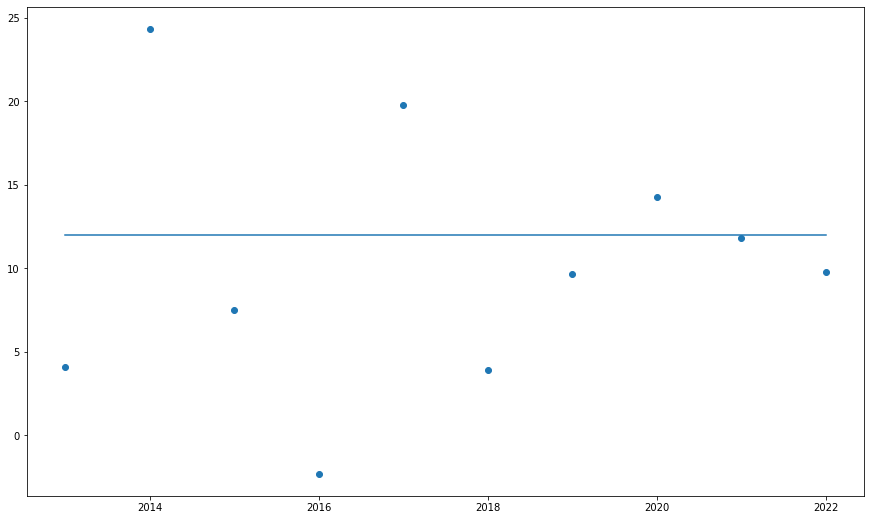

In [294]:
ax = plt.scatter(x_vals, team1_y_vals)
#plt.plot(x_vals, team2_y_vals)
plt.plot(x_vals, np.array([12]*10))

#plt.plot([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], 
  #       [3, 4, 5, 6, 2, 2, 9, 20, 21, 22])

In [300]:
def get_team_object_for(team_name):
    return name_to_object_dict[team_name]

In [301]:
end_of_season_table()

,team_name,team_attack_score,team_defence_score,shifted_team_defence_score,differential
1,Geelong Cats,117.116567,90.385249,109.614751,26.731317
2,Melbourne,109.859512,94.891066,105.108934,14.968445
3,Sydney Swans,112.388415,97.958621,102.041379,14.429795
4,Richmond,114.721760,103.629535,96.370465,11.092224
5,Port Adelaide,109.039081,99.299533,100.700467,9.739549
6,Brisbane Lions,111.989102,102.803699,97.196301,9.185403
7,Western Bulldogs,110.361479,103.204527,96.795473,7.156953
8,Carlton,107.019066,100.689092,99.310908,6.329975
9,Fremantle,101.941157,96.276688,103.723312,5.664469
10,Collingwood,102.580664,100.715075,99.284925,1.865589


In [295]:
t = get_team_object_for("Melbourne")

In [296]:
t.log

,home_team,away_team,scaled_attack_score,scaled_defence_score,current_attack_score,current_defence_score
0,Melbourne,Western Bulldogs,1.428060,0.852526,1.021403,0.992626
1,Gold Coast Suns,Melbourne,0.983389,1.010776,1.019502,0.993534
2,Melbourne,Essendon,1.398695,0.907077,1.038462,0.989211
3,Port Adelaide,Melbourne,1.054128,0.730757,1.039245,0.976288
4,Melbourne,GWS Giants,1.241872,0.795812,1.049377,0.967264
5,Richmond,Melbourne,1.335313,0.680898,1.063673,0.952946
6,Melbourne,Hawthorn,1.095775,1.067602,1.065278,0.958679
7,Melbourne,St Kilda,1.079168,0.714760,1.065973,0.946483
8,West Coast Eagles,Melbourne,1.220324,0.764615,1.073690,0.937390
9,North Melbourne,Melbourne,1.148362,0.707383,1.077424,0.925889


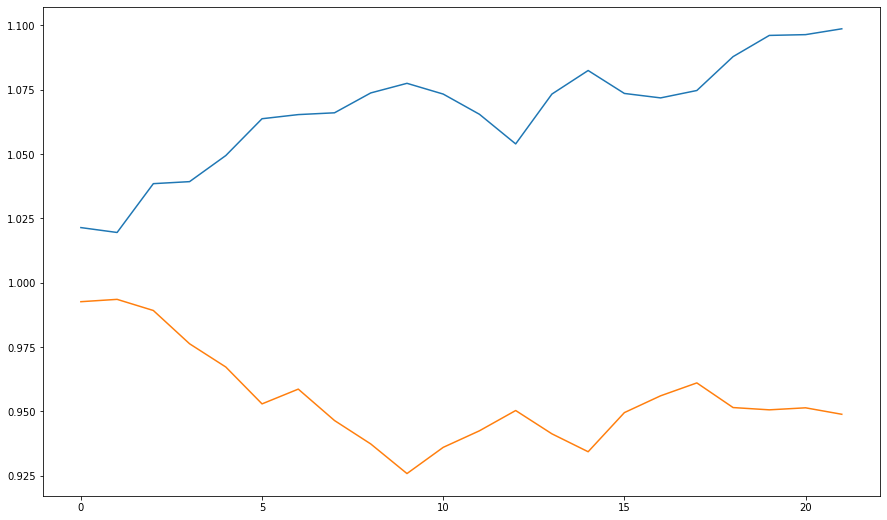

In [297]:
plt.plot(t.log.index, t.log["current_attack_score"], t.log["current_defence_score"])

In [298]:
# blue is attack

In [299]:
t.log

,home_team,away_team,scaled_attack_score,scaled_defence_score,current_attack_score,current_defence_score
0,Melbourne,Western Bulldogs,1.428060,0.852526,1.021403,0.992626
1,Gold Coast Suns,Melbourne,0.983389,1.010776,1.019502,0.993534
2,Melbourne,Essendon,1.398695,0.907077,1.038462,0.989211
3,Port Adelaide,Melbourne,1.054128,0.730757,1.039245,0.976288
4,Melbourne,GWS Giants,1.241872,0.795812,1.049377,0.967264
5,Richmond,Melbourne,1.335313,0.680898,1.063673,0.952946
6,Melbourne,Hawthorn,1.095775,1.067602,1.065278,0.958679
7,Melbourne,St Kilda,1.079168,0.714760,1.065973,0.946483
8,West Coast Eagles,Melbourne,1.220324,0.764615,1.073690,0.937390
9,North Melbourne,Melbourne,1.148362,0.707383,1.077424,0.925889


In [55]:
data = pd.Series()
for y in range(2013, 2023):
    away_clearances = pd.read_csv(construct_path_for_year(y))["away.stats.totals.clearances.centreClearances"]
    home_clearances = pd.read_csv(construct_path_for_year(y))["home.stats.totals.clearances.centreClearances"]
    data = pd.concat([data, away_clearances], ignore_index=True)
    print(y)
    

<ipython-input-55-9a308632f58d>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data = pd.Series()


2013
2014
2015
2016
2017
2018
2019
2020
2021
2022


In [56]:
data

0       18
1        9
2       18
3        8
4       10
        ..
1974    12
1975    19
1976    12
1977    13
1978    13
Length: 1979, dtype: int64

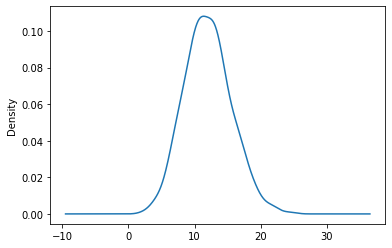

In [57]:
ax = data.plot.kde()

In [135]:
sigma = (data.std())
sigma

3.5888871548148487

In [136]:
mu = data.mean()
mu

11.994416243654822

<AxesSubplot:ylabel='Density'>

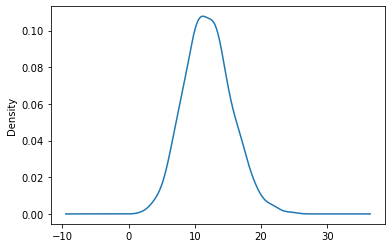

In [137]:
data.plot.kde()

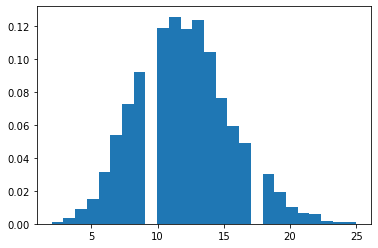

In [138]:
count, bins, ignored = plt.hist(data, 26, density=True)

<AxesSubplot:ylabel='Density'>

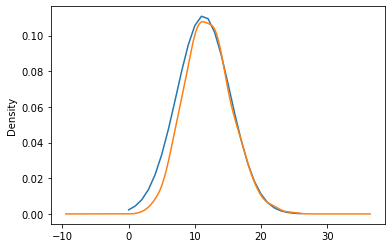

In [139]:
plt.plot(1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ))
data.plot.kde()

In [210]:
df = end_of_season_table()

In [211]:
df["zeroes"] = np.zeros(18)

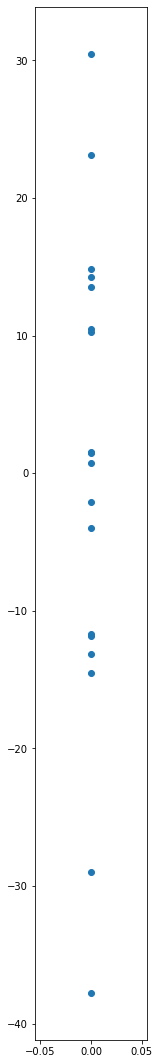

In [232]:
plt.rcParams["figure.figsize"] = (2,19)
plt.scatter(np.zeros(18), df["differential"])

In [187]:
game.columns

Index(['away.stats.totals.behinds', 'away.stats.totals.bounces',
       'away.stats.totals.clangers',
       'away.stats.totals.clearances.centreClearances',
       'away.stats.totals.clearances.stoppageClearances',
       'away.stats.totals.clearances.totalClearances',
       'away.stats.totals.contestedMarks',
       'away.stats.totals.contestedPossessions',
       'away.stats.totals.disposalEfficiency', 'away.stats.totals.disposals',
       'away.stats.totals.dreamTeamPoints', 'away.stats.totals.extendedStats',
       'away.stats.totals.freesAgainst', 'away.stats.totals.freesFor',
       'away.stats.totals.goalAccuracy', 'away.stats.totals.goalAssists',
       'away.stats.totals.goalEfficiency', 'away.stats.totals.goals',
       'away.stats.totals.handballs', 'away.stats.totals.hitouts',
       'away.stats.totals.inside50s', 'away.stats.totals.intercepts',
       'away.stats.totals.interchangeCounts.interchangeCap',
       'away.stats.totals.interchangeCounts.interchangeCountQ1',
  